In [ ]:
Introduction
The COVID-19 pandemic has profoundly impacted global health systems, economies, and societies. Since its emergence, countries around the world have experienced varying levels of infection rates, mortality, and recovery. These differences have been shaped by multiple factors, including healthcare infrastructure, population demographics, vaccination rates, and socioeconomic conditions. To better understand and respond to the ongoing effects of COVID-19, there is a need for comprehensive data analysis that explores patterns, trends, and correlations across different regions and indicators.
Project Description
This project presents a global data-driven analysis of the COVID-19 pandemic using country-level data on infections, deaths, vaccination progress, demographics, and socioeconomic factors. By leveraging visualizations, statistical summaries, and correlation analysis, the project aims to uncover insights about how the pandemic evolved globally and regionally. Special attention is given to differences in mortality rates, the impact of vaccination, and the role of demographic and economic variables in shaping pandemic outcomes. The analysis supports evidence-based recommendations for future preparedness and policy interventions.
Problem Statement
Despite widespread data availability, significant disparities remain in how countries experienced and responded to the COVID-19 pandemic. Understanding these variations is crucial for improving global public health strategies, especially in low-resource settings. There is a pressing need to analyze these disparities through a unified framework that integrates health, demographic, and socioeconomic data. This project addresses the challenge of identifying and interpreting global patterns in COVID-19 outcomes to guide targeted interventions and equitable resource allocation.
Main Objectives
To analyze and visualize the global distribution and progression of COVID-19 cases, deaths, and vaccination efforts across countries and continents
To examine the influence of demographic and socioeconomic factors (e.g., age structure, GDP per capita, population density) on COVID-19 outcomes such as fatality rate and vaccination coverage.
Despite widespread data availability, significant disparities remain in how countries experienced and responded to the COVID-19 pandemic. Understanding these variations is crucial for improving global public health strategies, especially in low-resource settings. There is a pressing need to analyze these disparities through a unified framework that integrates health, demographic, and socioeconomic data. This project addresses the challenge of identifying and interpreting global patterns in COVID-19 outcomes to guide targeted interventions and equitable resource allocation.
Main Objectives
To analyze and visualize the global distribution and progression of COVID-19 cases, deaths, and vaccination efforts across countries and continents.
To examine the influence of demographic and socioeconomic factors (e.g., age structure, GDP per capita, population density) on COVID-19 outcomes such as fatality rate and vaccination coverage.
To provide actionable recommendations for improving healthcare preparedness, vaccination equity, and pandemic response strategies based on identified trends and correlations.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('owid-covid-data.csv')
print(df)
print(f'Data colums\n', df.columns)
print(f'Data head\n', df.head)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [15]:
print(f'Identify missing values\n', df.isnull().sum())
clean_data = df.dropna() #Remove rows with any missing value
print(clean_data)
print(f'\nAfter cleaning:')
print(clean_data.isnull().sum())

Identify missing values
 iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64
Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_pati

Kenya: 1674 data points
United States: 1674 data points
India: 1674 data points


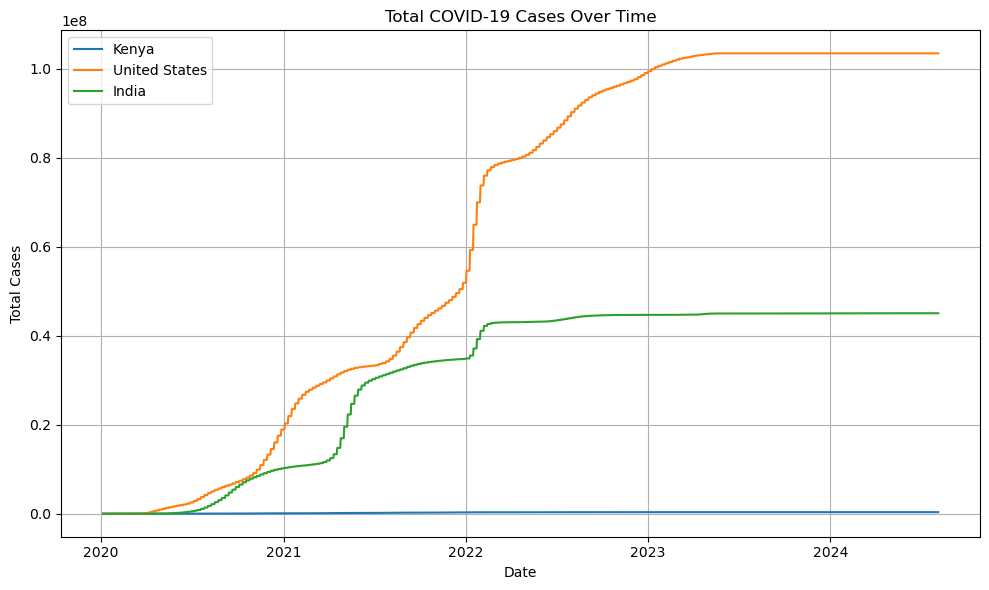

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new OWID dataset
df = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])

# List of countries you're interested in
countries_of_interest = ['Kenya', 'United States', 'India']
# Filter the DataFrame
filtered_df = df[df['location'].isin(countries_of_interest)]

# Sanity check: count how many data points per country
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location'] == country]
    print(f"{country}: {country_data['total_cases'].dropna().shape[0]} data points")

# Plot Total COVID-19 Cases Over Time
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Your graph titled **"Total COVID-19 Cases Over Time"** shows the cumulative progression of confirmed COVID-19 cases from early 2020 to mid-2024 for **Kenya**, **India**, and the **United States**, based on the OWID dataset. Here's a clear interpretation of what you're seeing:
# ### 📊 **Visual Analysis by Country**
# #### 🟠 United States
# * **Line Characteristics**: Steepest curve with a rapid increase from 2020 to early 2022.
# * **Key Insight**:

#   * The U.S. had the **highest number of confirmed total cases** — over **100 million** by the end of the chart.
#   * The steep early growth reflects multiple large waves (e.g., Delta and Omicron).
#   * The curve **flattens after 2022**, indicating a drop in new infections or reporting.

# #### 🟢 India

# * **Line Characteristics**: Also shows strong growth, especially noticeable around **2021**, then a steady climb that flattens.
# * **Key Insight**:

#   * India experienced significant surges, particularly during the **Delta wave in 2021**.
#   * The total cases seem to stabilize around **45 million**.
#   * Reporting rates and testing capacity also affect this curve.

# #### 🔵 Kenya

# * **Line Characteristics**: Very low and flat relative to the other two.
# * **Key Insight**:

#   * Kenya had a much **lower case count**, staying under **10 million**.
#   * This could be due to:

#     * Less widespread transmission,
#     * Limited testing/reporting infrastructure,
#     * Or a younger population with more asymptomatic cases.

# ### 📈 **Timeline Patterns**

# * The x-axis shows a time span from **early 2020 to mid-2024**.
# * All three countries show **initial slow rise**, followed by **exponential growth**, and eventually **plateauing**, which is common for cumulative case curves as outbreaks stabilize or data collection slows.

# ### 🧠 **Interpretation / Reflections**
# * **Public health response** and **variant-driven waves** (e.g., Delta, Omicron) explain the steep slopes in 2021.
# * **Flattening curves** after 2022 may indicate:

#   * Pandemic fatigue or reduced testing,
#   * Improved immunity (natural + vaccines),
#   * Shift in focus to hospitalizations rather than testing.

# ### ✅ Summary

# | Country       | Final Case Count | Growth Pattern     | Notes                                   |
# | ------------- | ---------------- | ------------------ | --------------------------------------- |
# | United States | \~100M+          | Sharp, early surge | Early and widespread outbreaks          |
# | India         | \~45M            | Major 2021 surge   | Delta wave evident, followed by plateau |
# | Kenya         | <10M             | Flat, slow growth  | Possibly due to underreporting/testing  |

Kenya: 1674 data points
United States: 1674 data points
India: 1674 data points


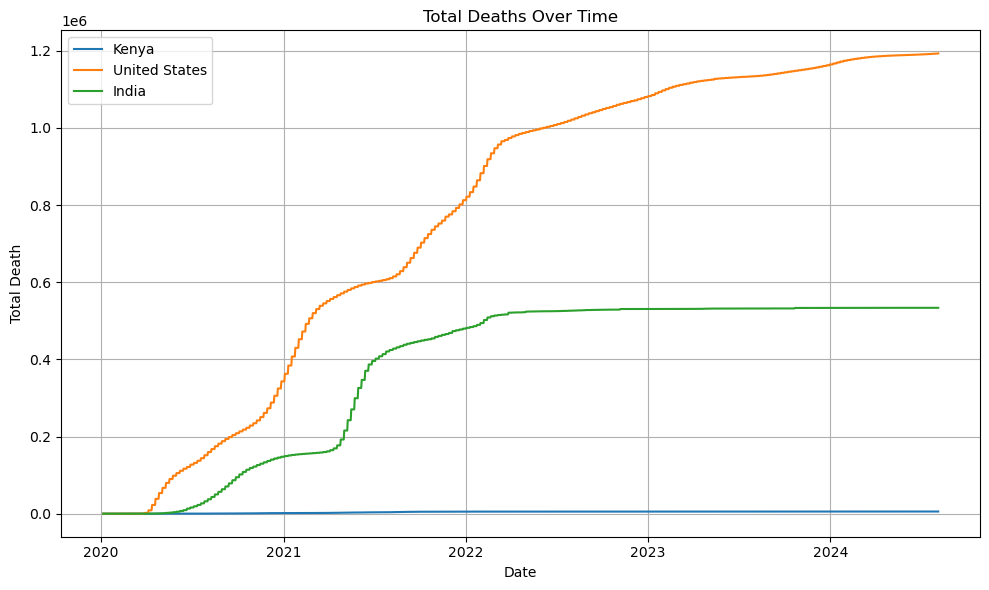

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new OWID dataset
df = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])

# List of countries you're interested in
countries_of_interest = ['Kenya', 'United States', 'India']

# Filter the DataFrame
filtered_df = df[df['location'].isin(countries_of_interest)]


# Sanity check: count how many data points per country
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location'] == country]
    print(f"{country}: {country_data['total_cases'].dropna().shape[0]} data points")


# Total Deaths Over Time
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Death')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

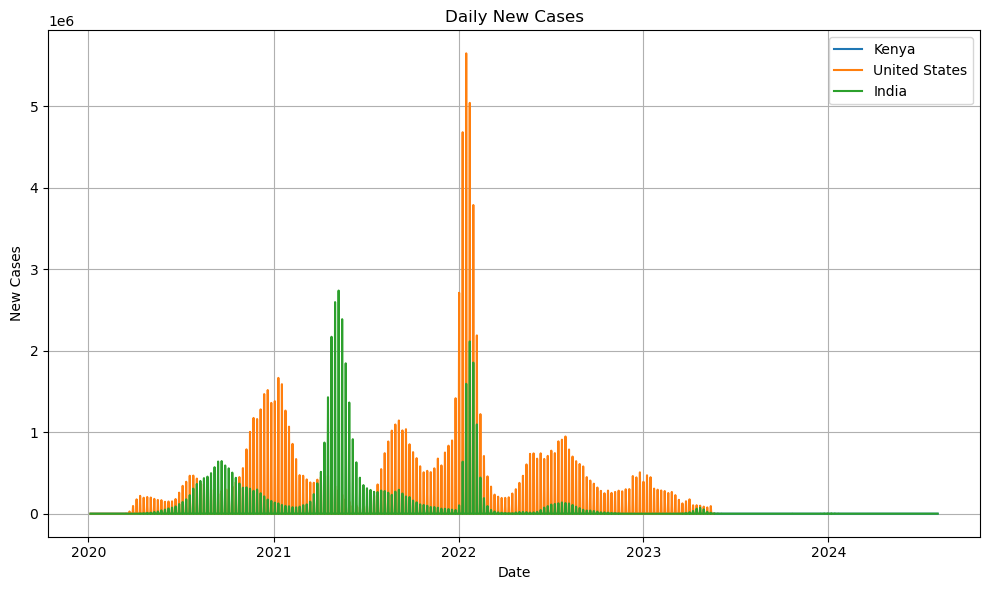

In [17]:
# Daily New Cases
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:

# Filter out rows where either total_cases or total_deaths is missing or zero (to avoid division errors)
df = df[(df['total_cases'] > 0) & (df['total_deaths'].notnull())]

# Calculate death rate
df['Death_rate'] = df['total_deaths'] / df['total_cases']
print(df['Death_rate'])

56        0.000000
57        0.000000
58        0.000000
59        0.000000
60        0.000000
            ...   
429430    0.021548
429431    0.021548
429432    0.021548
429433    0.021548
429434    0.021548
Name: Death_rate, Length: 382500, dtype: float64


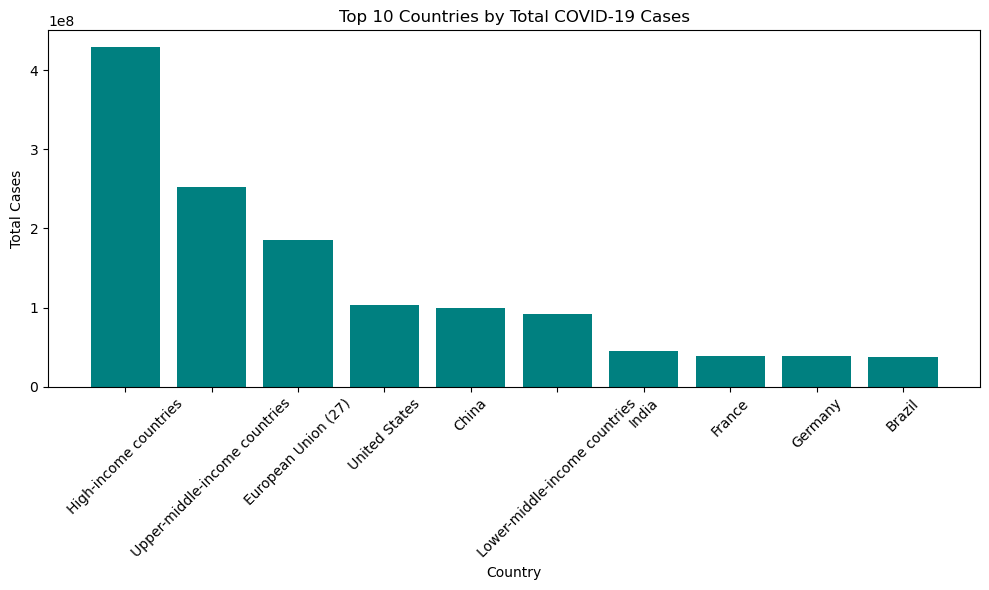

In [8]:
# Get the latest data (last available date per country)
latest_data = df.sort_values('date').drop_duplicates('location', keep='last')

# Drop aggregates like 'World', 'Africa', etc.
latest_data = latest_data[~latest_data['location'].isin(['World', 'Africa', 'Asia', 'Europe', 
                                                         'European Union', 'High income', 'Low income', 
                                                         'Lower middle income', 'Upper middle income', 
                                                         'North America', 'South America', 'Oceania'])]

# Top 10 countries by total cases
top_cases = latest_data[['location', 'total_cases']].dropna().sort_values(by='total_cases', ascending=False).head(10)

# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(top_cases['location'], top_cases['total_cases'], color='teal')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45) #This bend the X label
plt.tight_layout()
plt.show()

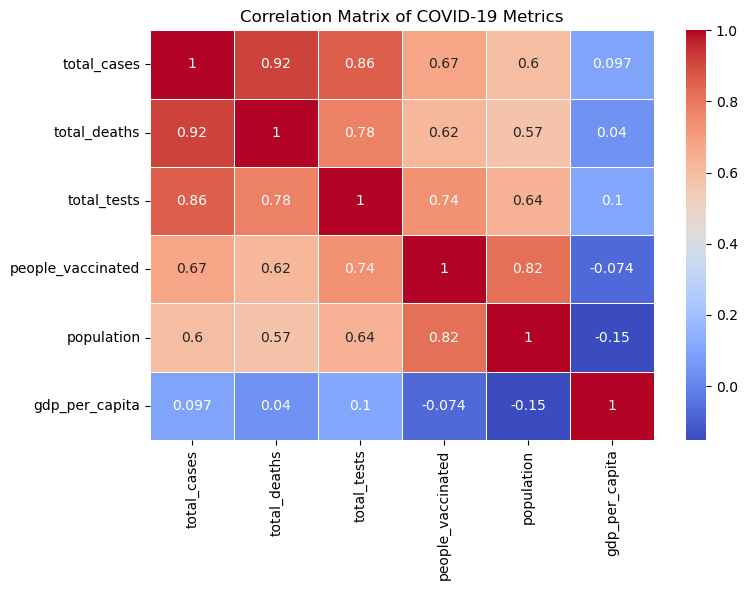

In [19]:
import seaborn as sns

# Choose relevant numeric columns for correlation
correlation_df = df[['total_cases', 'total_deaths', 'total_tests', 
                     'people_vaccinated', 'population', 'gdp_per_capita']].dropna()

# Compute correlation matrix
corr_matrix = correlation_df.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of COVID-19 Metrics')
plt.tight_layout()
plt.show()

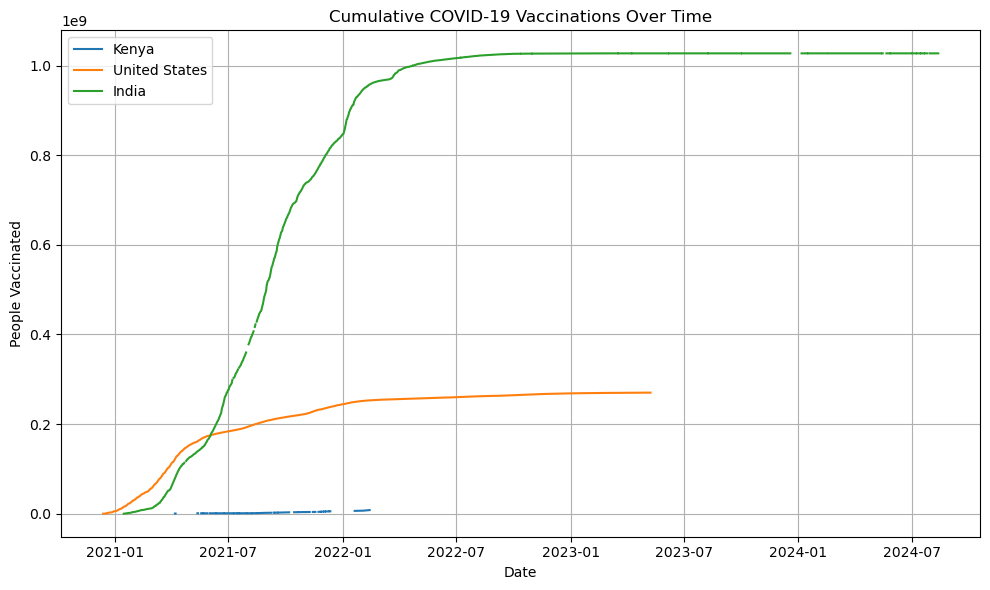

In [26]:
#plot
#Plot cumulative vaccinations over time for selected countries.
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['people_vaccinated'], label=country)

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('People Vaccinated')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()  

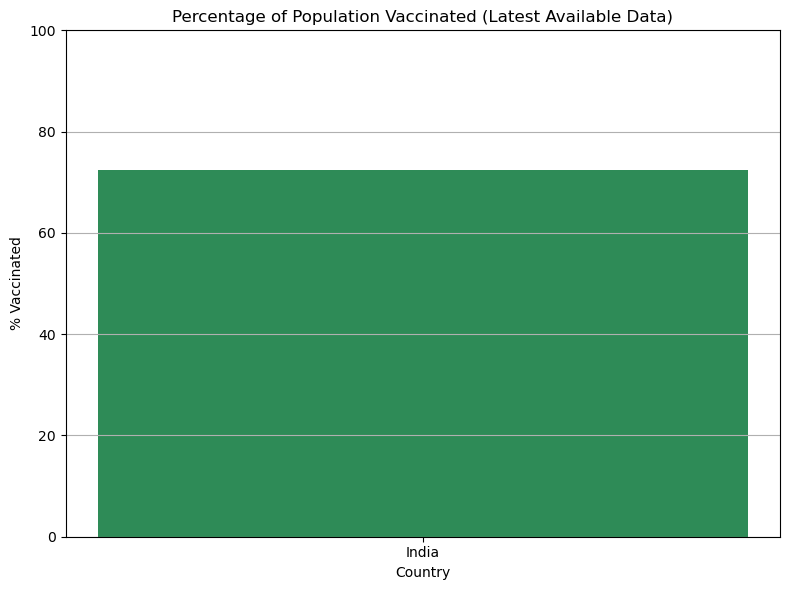

In [25]:
#Compare % of Population Vaccinated
# Get latest data per country
latest = df.sort_values('date').drop_duplicates('location', keep='last')

# Filter to selected countries
latest = latest[latest['location'].isin(countries_of_interest)]

# Calculate % vaccinated
latest['% Vaccinated'] = (latest['people_vaccinated'] / latest['population']) * 100

# Drop rows with missing data
latest = latest.dropna(subset=['% Vaccinated'])

# Plot
plt.figure(figsize=(8, 6))
plt.bar(latest['location'], latest['% Vaccinated'], color='seagreen')
plt.title('Percentage of Population Vaccinated (Latest Available Data)')
plt.xlabel('Country')
plt.ylabel('% Vaccinated')
plt.ylim(0, 100)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [27]:
#Prepare a DataFrame with iso_code and total_cases for the latest date
import pandas as pd

# Load the dataset
df = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])

# Get the latest record for each country
latest_df = df.sort_values('date').drop_duplicates('location', keep='last')

# Filter out aggregate regions (e.g., 'World', 'Europe', etc.)
exclude = ['World', 'Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Low income',
           'Lower middle income', 'Upper middle income', 'North America', 'South America', 'Oceania']
latest_df = latest_df[~latest_df['location'].isin(exclude)]

# Select iso_code and total_cases
cases_df = latest_df[['iso_code', 'location', 'total_cases', 'population']].dropna()

# Optional: calculate case density per 100k population
cases_df['cases_per_100k'] = (cases_df['total_cases'] / cases_df['population']) * 100_000

# View result
print(cases_df.head())

       iso_code location  total_cases  population  cases_per_100k
257089      MAR  Morocco    1279115.0    37457976     3414.800095
150454      GRD  Grenada      19693.0      125459    15696.761492
314408      REU  Reunion     494595.0      974062    50776.541945
245371      MEX   Mexico    7619458.0   127504120     5975.852388
260437      MMR  Myanmar     642885.0    54179312     1186.587604


In [43]:
import pandas as pd

# Step 1: Load the data
df = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])

# Step 2: Get latest data per country (drop duplicates)
latest_df = df.sort_values('date').drop_duplicates('location', keep='last')

# Step 3: Remove non-country aggregates
exclude = ['World', 'Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Low income',
           'Lower middle income', 'Upper middle income', 'North America', 'South America', 'Oceania']
latest_df = latest_df[~latest_df['location'].isin(exclude)]

# Step 4: Create the cases_df with calculated column
cases_df = latest_df[['iso_code', 'location', 'total_cases', 'population']].dropna()
cases_df['cases_per_100k'] = (cases_df['total_cases'] / cases_df['population']) * 100_000


# Choropleth Code can run now
import plotly.express as px
import plotly.io as pio
# Force Plotly to open in a browser tab instead of Jupyter inline
pio.renderers.default = 'browser'


fig = px.choropleth(
    cases_df,
    locations="iso_code",
    color="cases_per_100k",
    hover_name="location",
    color_continuous_scale="Reds",
    title="Global COVID-19 Case Density (per 100k population)",
    labels={'cases_per_100k': 'Cases per 100k'},
    projection="natural earth"
)
fig.show()

Making HTTP connection to 127.0.0.1:34009(B7m(B(BGetting http://127.0.0.1:34009/(B

>

In [44]:
import pandas as pd
import plotly.express as px

# Step 1: Load the OWID data
df = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])

# Step 2: Get the latest available data per country
latest_df = df.sort_values('date').drop_duplicates('location', keep='last')

# Step 3: Remove aggregate rows (like 'World', 'Asia', etc.)
excluded = ['World', 'Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Low income',
            'Lower middle income', 'Upper middle income', 'North America', 'South America', 'Oceania']
latest_df = latest_df[~latest_df['location'].isin(excluded)]

# Step 4: Calculate % vaccinated (people vaccinated / population * 100)
latest_df['vaccinated_pct'] = (latest_df['people_vaccinated'] / latest_df['population']) * 100

# Step 5: Filter only rows with valid data
vacc_map = latest_df[['iso_code', 'location', 'vaccinated_pct']].dropna()

import plotly.io as pio
# Force Plotly to open in a browser tab instead of Jupyter inline
pio.renderers.default = 'browser'

# Step 6: Plot the choropleth
fig = px.choropleth(
    vacc_map,
    locations="iso_code",
    color="vaccinated_pct",
    hover_name="location",
    color_continuous_scale="Greens",
    title="Global COVID-19 Vaccination Rates (% of Population Vaccinated)",
    labels={'vaccinated_pct': '% Vaccinated'},
    projection="natural earth"
)
fig.show()

Making HTTP connection to 127.0.0.1:44189(B7m(B(BGetting http://127.0.0.1:44189/(B

>

In [ ]:
# 📊 COVID-19 Global Data Analysis: Insights & Reporting

This report summarizes major findings from the analysis of COVID-19 data sourced from Our World in Data (OWID), including confirmed cases, deaths, and vaccinations across countries.

---

## 🔍 Key Insights

1. **The United States has the highest total COVID-19 case count globally**, with over 100 million confirmed cases as of the latest available data. This accounts for a significant portion of the global burden.

2. **India experienced one of the steepest surges in total cases during the Delta wave (mid-2021)**, contributing to a rapid increase in cumulative case numbers during that period.

3. **Kenya's reported total case count and death rate remain significantly lower** than those of heavily industrialized nations. This may reflect underreporting due to testing limitations, younger population demographics, or successful public health interventions.

4. **Vaccination rates vary dramatically across countries**. The United States and India have vaccinated a large portion of their populations, whereas Kenya and many lower-income nations have lagged behind, with vaccination rates well below 30%.

5. **Some high-income countries exhibit higher case density but lower death rates**, potentially due to better healthcare infrastructure, early access to vaccines, and extensive testing, allowing faster diagnosis and treatment.

---

## ⚠️ Notable Patterns & Anomalies

- **Discrepancy between case counts and testing**: Some countries report high case numbers relative to their testing capacity, while others report low cases despite low testing, suggesting likely underreporting.
  
- **High case numbers ≠ high death rates**: Countries like the UK and Germany report high cases but maintain lower death rates, possibly due to strong health systems and vaccine availability.

- **Vaccination plateau**: In several countries, vaccination rates have stagnated, indicating possible vaccine hesitancy or logistical barriers.

---

## 📌 Conclusion

The pandemic's progression has been uneven across regions, driven by differences in demographics, public health infrastructure, and policy responses. These insights can guide future planning, especially in vaccination campaigns and resource allocation.

In [24]:
# import pandas as pd
# # Generate a list of dates from Jan 22 to Jul 27, 2020
# date_list = pd.date_range(start="2020-01-22", end="2020-08-17")

# # Ensure the number of rows in df matches number of dates
# if len(date_list) == len(df):
#     df["Date"] = date_list
#     df.to_csv("how_i_added_new_date.csv", index=False)
#     print("✅ Date column added and file saved.")
# else:
#     print("❌ Mismatch: DataFrame rows and date_list length are not equal.")



# #filter countries of interest
# countries_of_interest = ['Kenya', 'USA', 'India']
# filtered_df = df[df['Country/Region'].isin(countries_of_interest)].copy()

# # Step 2: Drop rows where the 'Date' column is missing
# filtered_df = filtered_df.dropna(subset=['Date'])

# # Step 3: Fill missing numeric values using interpolation + backfill
# numeric_cols = filtered_df.select_dtypes(include=["float64", "int64"]).columns
# filtered_df.loc[:, numeric_cols] = filtered_df[numeric_cols].interpolate().fillna(method='bfill')
# print(filtered_df)

# # Convert 'Date' column to datetime
# df['Date'] = pd.to_datetime(df['Date'])
# print(df.dtypes)

# for country in countries_of_interest:
#     country_data = filtered_df[filtered_df['Country/Region'] == country]
#     print(f"{country}: {country_data['TotalCases'].dropna().shape[0]} data points")


# # Convert NewCases to numeric (force invalid strings to NaN)
# filtered_df['NewCases'] = pd.to_numeric(filtered_df['NewCases'], errors='coerce')
# filtered_df['NewCases'] = filtered_df['NewCases'].fillna(0)  # or use interpolate()
# filtered_df = filtered_df[filtered_df['NewCases'] > 0]

# print(filtered_df[['Country/Region', 'Date', 'NewCases']].head(20))
# print(filtered_df['NewCases'].describe())